<a href="https://colab.research.google.com/github/sabnadk/PCVK_Ganjil_2023/blob/main/Week7_Sabna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modul 7 - Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Edge Detection**

- Nama   : Sabna Devi Kumalasari
- NIM    : 2141720009
- Kelas  : TI-3E

Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.

### **Konvolusi tanpa Library**
**Membuat fungsi konvolusi**
Fungsi konvolsi yang dibuat memiliki parameter berupa:

1. citra masukan,
2. kernel berupa matriks untuk memfilter citra,
3. nilai stride/besarnya pergeseran untuk setiap konvolusi,
4. nilai pad yang akan ditambahkan pada citra

In [3]:
# konvolusi tanpa library
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

  # load citra untuk proses citra keabuan
img_m = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/female.tiff')
img_s = cv.resize(img_m, (0,0), fx=0.5, fy=0.5)
img_gray = cv.cvtColor(img_s, cv.COLOR_BGR2GRAY)

Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut:

Sharpen

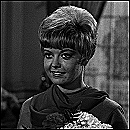

In [4]:
# Operasi Sharpen dengan kernel matriks:
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

# memanggil konvolusi dan menerapkan setiap filter
cv2_imshow(convolution2d(img_gray, kernel_sharpen, 1, 2))

Emboss

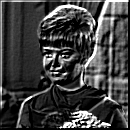

In [5]:
# Operasi Emboss dengan kernel matriks:
kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

cv2_imshow(convolution2d(img_gray, kernel_emboss, 1, 2))

Left Sobel Edge Detection

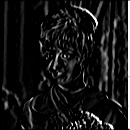

In [6]:
# Operasi Left Sobel Edge Detection dengan kernel matriks:
kernel_sobel = np.array([[1,0,-1],
                           [2,0,-2],
                           [1,0,-1]])

# memanggil konvolusi dan menerapkan setiap filter
cv2_imshow(convolution2d(img_gray, kernel_sobel, 1, 2))

Canny Edge Detection

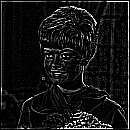

In [7]:
# Operasi Canny Edge Detection dengan kernel matriks:
kernel_canny = np.array([[-1,-1,-1],
                           [-1,8,-1],
                           [-1,-1,-1]])

# memanggil konvolusi dan menerapkan setiap filter
cv2_imshow(convolution2d(img_gray, kernel_canny, 1, 2))

Prewitt Edge Detection

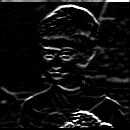

In [8]:
# Operasi Prewitt Edge Detection dengan kernel matriks:
kernel_prewitt = np.array([[-1,-1,-1],
                           [0,0,0],
                           [1,1,1]])

# memanggil konvolusi dan menerapkan setiap filter
cv2_imshow(convolution2d(img_gray, kernel_prewitt, 1, 2))

5x5 Gaussian Blur

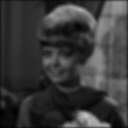

In [9]:
# Operasi 5x5 Gaussian Blur dengan kernel matriks:

kernel_size = 5
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

21x21 Gaussian Blur

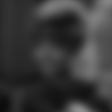

In [10]:
# Operasi 21x21 Gaussian Blur dengan kernel matriks:

kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel, 1, 2))

In [11]:
#image sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])
#emboss
kernel_emboss = np.array([[-2, -1, 0],
                          [-1,  1, 1],
                          [ 0,  1, 2]])
#canny edge detection
kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])
#left Sobel filter
kernel_sobel = np.array([[1, 0, -1],
                         [2, 0, -2],
                         [1, 0, -1]])
#prewitt filter
kernel_prewitt = np.array([[-1,-1,-1],
                           [0,0,0],
                           [1,1,1]])
#prewitt filter
kernel_roberts = np.array([[-1,0],
                           [0,1]])
#box blur
kernel_box = (1 / 9.0) * np.array([[1, 1, 1],
                                   [1, 1, 1],
                                   [1, 1, 1]])
#3x3 gaussian blur
kernel_gaussian3 = (1/16.0)*np.array([[1,2,1],
                                     [2,4,2],
                                     [1,2,1]])
# Gaussian Blur 5x5
kernel_gaussian5 = (1 / 256.0) * np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, 36, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])
# Gaussian Blur 21x21
kernel_size=21
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()
#note: hasil cv.getGaussianKernel adalah matriks 1D, untuk mengubahnya jadi 2D harus dikalikan dengan transposenya
# @ digunakan untuk perkalian matriks

"""kernel_gaussian21 = np.array(([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0, 0],
                     [0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0, 0],
                     [0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0, 0],
                     [0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.000001, 0.000001, 0.000001, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0.000001, 0.000014, 0.000055, 0.000088, 0.000055, 0.000014, 0.000001, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0.000001, 0.000036, 0.000362, 0.001445, 0.002289, 0.001445, 0.000362, 0.000036, 0.000001, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0.000014, 0.000362, 0.003672, 0.014648, 0.023204, 0.014648, 0.003672, 0.000362, 0.000014, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0.000001, 0.000055, 0.001445, 0.014648, 0.058433, 0.092564, 0.058433, 0.014648, 0.001445, 0.000055, 0.000001, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0.000001, 0.000088, 0.002289, 0.023204, 0.092564, 0.146632, 0.092564, 0.023204, 0.002289, 0.000088, 0.000001, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0.000001, 0.000055, 0.001445, 0.014648, 0.058433, 0.092564, 0.058433, 0.014648, 0.001445, 0.000055, 0.000001, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0.000014, 0.000362, 0.003672, 0.014648, 0.023204, 0.014648, 0.003672, 0.000362, 0.000014, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0.000001, 0.000036, 0.000362, 0.001445, 0.002289, 0.001445, 0.000362, 0.000036, 0.000001, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0.000001, 0.000014, 0.000055, 0.000088, 0.000055, 0.000014, 0.000001, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.000001, 0.000001, 0.000001, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0, 0],
                     [0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0, 0],
                     [0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0, 0],
                     [0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0, 0],
                     [0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0, 0]]),np.float32)"""
#low pass filter
kernel_low = (1/12.0)*np.array([[1,1,1],
                                [1,4,1],
                                [1,1,1]])
#high pass filter
kernel_high = np.array([[-1,0,1],
                        [-1,0,3],
                        [-3,0,1]])

#menyimpan semua kernel pada array
kernels = [kernel_sharpen, kernel_emboss, kernel_canny, kernel_sobel, kernel_prewitt, kernel_roberts,
           kernel_box, kernel_gaussian3, kernel_gaussian5, gauss_kernel, kernel_low, kernel_high]
kernel_name = ['Sharpen', 'Emboss', 'Canny Edge Detection',
               'Left Sobel Edge Detection', 'Prewitt Edge Detection', 'Roberts Edge Detection', 'Box Blur', '3x3 Gaussian Blur',
               '5x5 Gaussian Blur', '21x21 Gaussian Blur', 'Low Pass Filter', 'High Pass Filter']

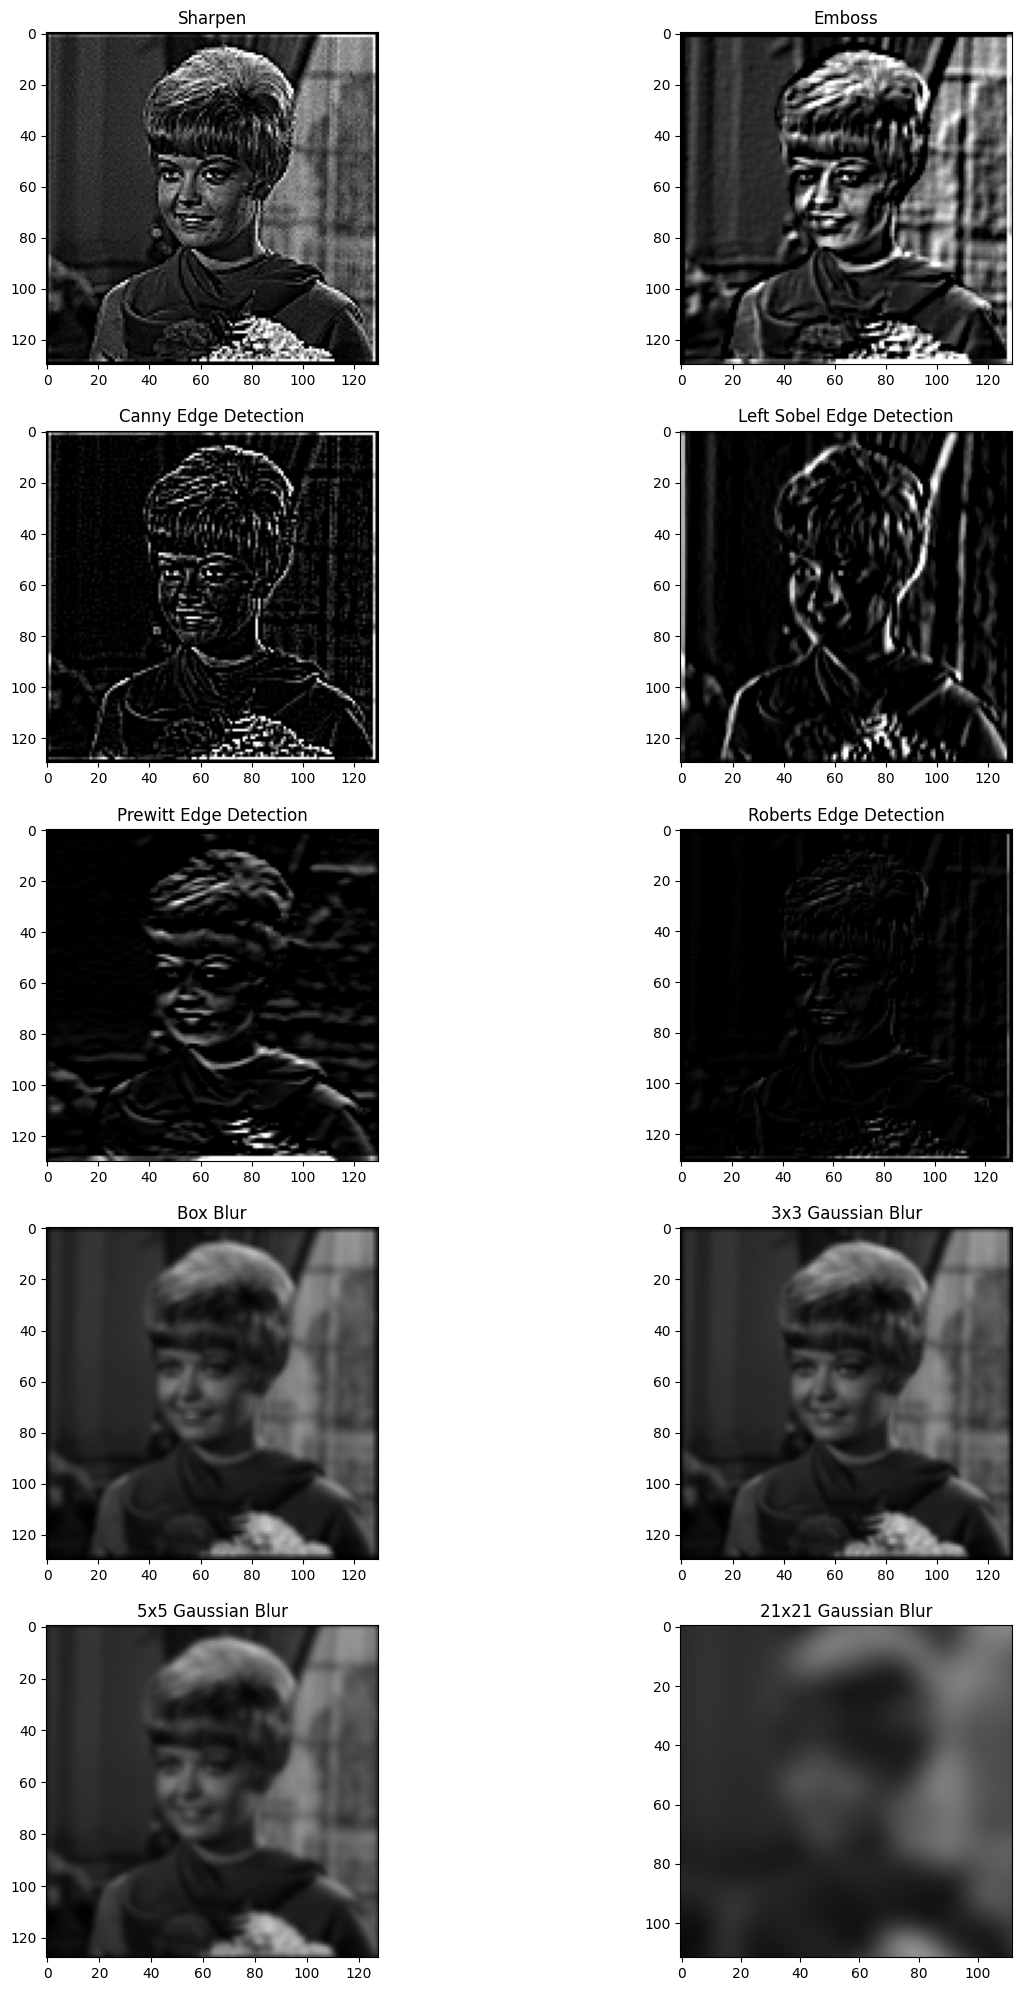

In [12]:
figure, axis = plt.subplots(5,2, figsize=(15,25))

for kernel, name, ax in zip(kernels, kernel_name, axis.flatten()):
     conv_image=im.fromarray(convolution2d(img_gray,kernel[::-1, ::-1],1,2))
     ax.imshow(conv_image)
     ax.set_title(name)

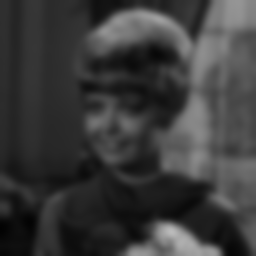

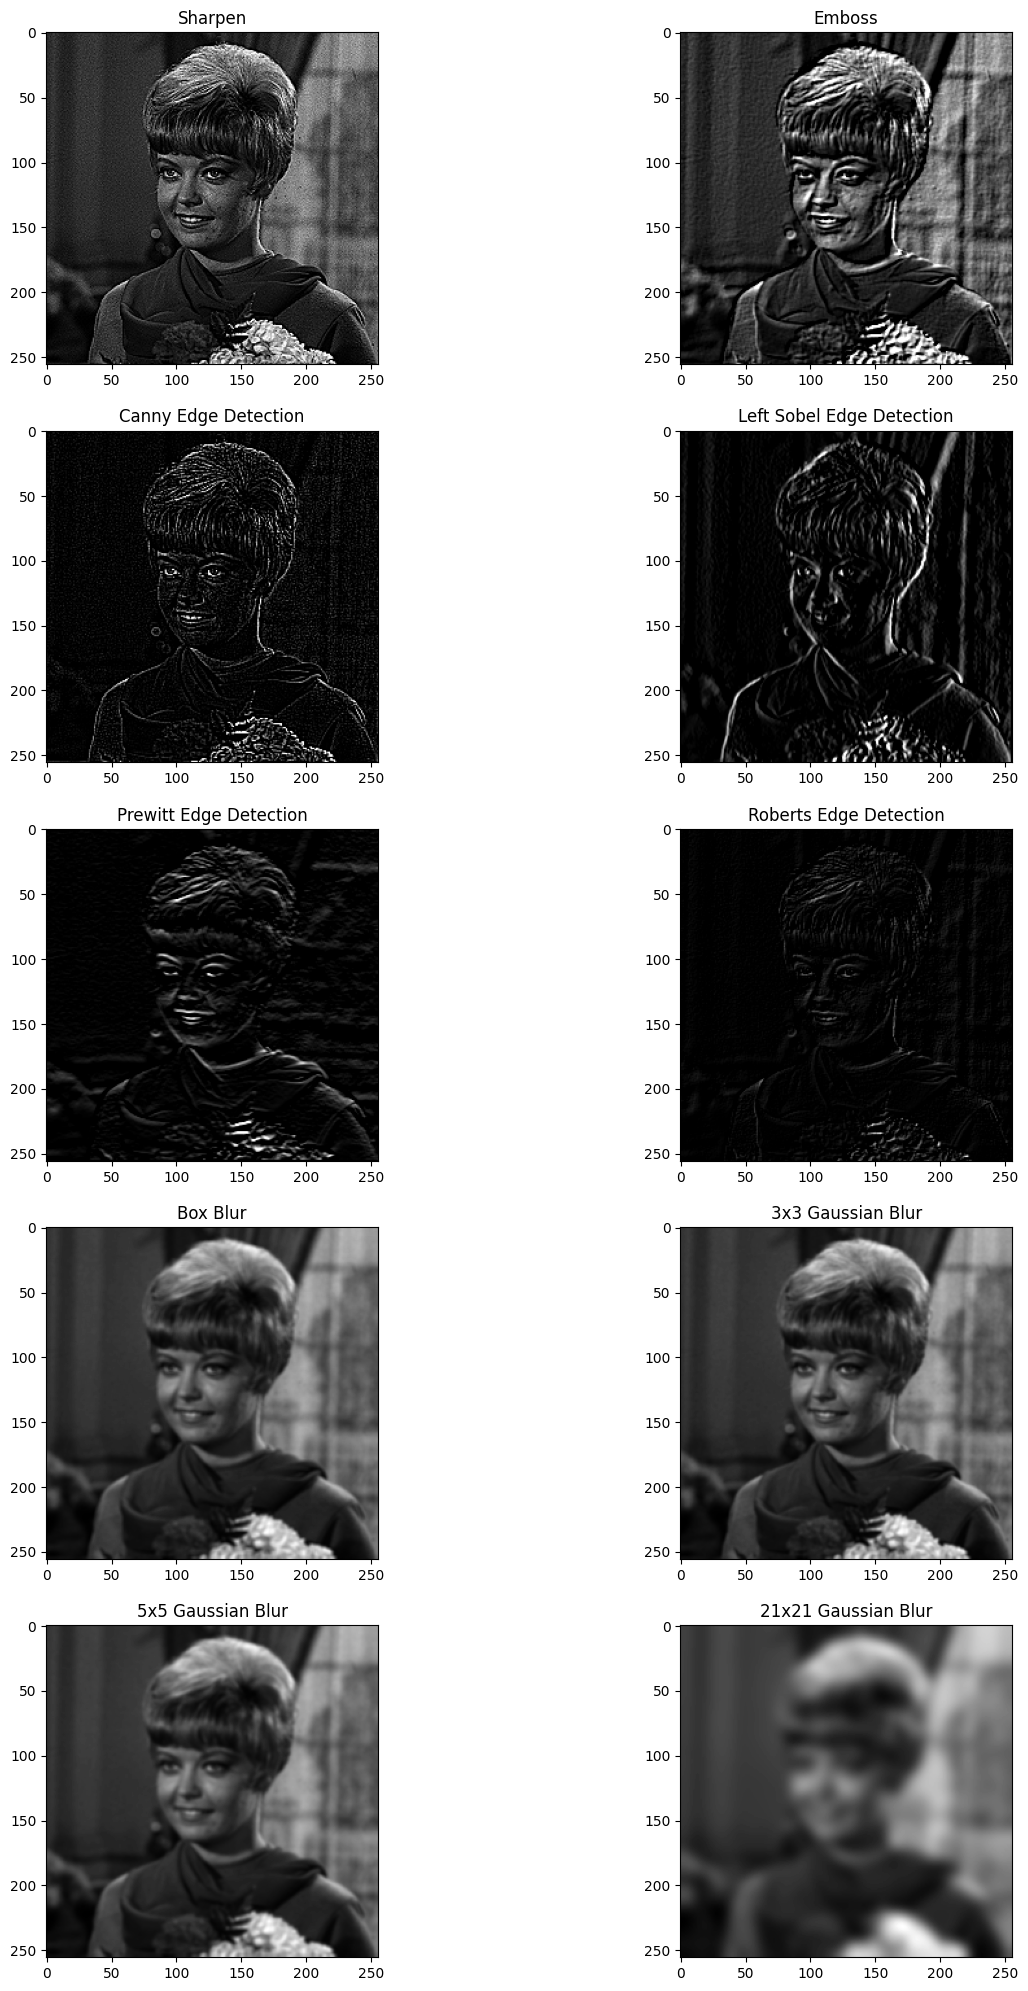

In [13]:
img = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/female.tiff')
img_color = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

figure, axis = plt.subplots(5,2, figsize=(15,25))

for kernel, name, ax in zip(kernels, kernel_name, axis.flatten()):
     conv_image=im.fromarray(cv.filter2D(img_color, -1, kernel[::-1, ::-1]))
     ax.imshow(conv_image,cmap='gray')
     ax.set_title(name)

#fungsi gaussian blur dari opencv
blur = cv.GaussianBlur(img_color,(21,21),0)
cv2_imshow(blur)